In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
bikeshare = pd.read_csv('../__DATA__/los-angeles-metro-bike-share-trip-data/metro-bike-share-trip-data.csv')

In [13]:
bikeshare.head(5)

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long
0,1912818,180,2016-07-07T04:17:00,2016-07-07T04:20:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05..."
1,1919661,1980,2016-07-07T06:00:00,2016-07-07T06:33:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05..."
2,1933383,300,2016-07-07T10:32:00,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05..."
3,1944197,10860,2016-07-07T10:37:00,2016-07-07T13:38:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05..."
4,1940317,420,2016-07-07T12:51:00,2016-07-07T12:58:00,3032.0,34.049889,-118.25588,3032.0,34.049889,-118.25588,6674.0,0.0,Round Trip,Walk-up,"{'longitude': '-118.25588', 'latitude': '34.04...","{'longitude': '-118.25588', 'latitude': '34.04..."


In [14]:
# Lat and Long locations of bikes
dock_locs = bikeshare.groupby('Starting Station ID').min().iloc[:66,4:6]
dock_locs.fillna(dock_locs.mean(),inplace=True)
dock_locs.head(5)

,Starting Station Latitude,Starting Station Longitude
Starting Station ID,,
3000.0,34.044491,-118.256577
3005.0,34.048550,-118.259050
3006.0,34.045540,-118.256670
3007.0,34.050480,-118.254593
3008.0,34.046612,-118.262733


In [15]:
import geopandas as gpd
from shapely.geometry import Point, Polygon 

In [16]:
street_map = gpd.read_file('../__DATA__/LA Street Centerline/geo_export_85b97621-2493-4e30-bfe2-2dec0eb6d582.shp')

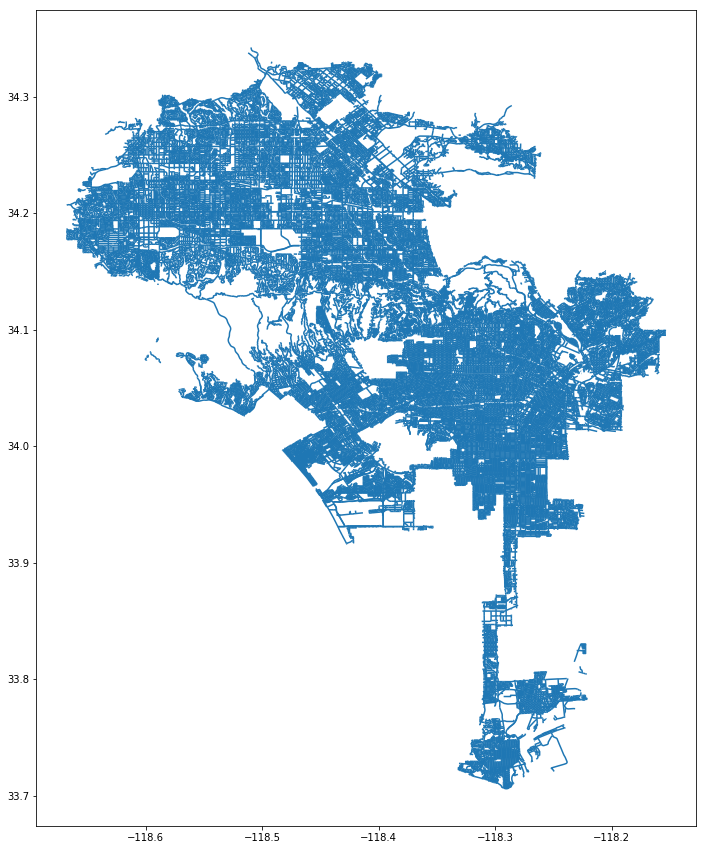

In [17]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax)

In [18]:
df = dock_locs
crs = {'init':'epsg:4326'}
df.head()

,Starting Station Latitude,Starting Station Longitude
Starting Station ID,,
3000.0,34.044491,-118.256577
3005.0,34.048550,-118.259050
3006.0,34.045540,-118.256670
3007.0,34.050480,-118.254593
3008.0,34.046612,-118.262733


In [19]:
geometry = [Point(xy) for xy in zip(df['Starting Station Longitude'], df['Starting Station Latitude'])]

In [20]:
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
geo_df.head()

,Starting Station Latitude,Starting Station Longitude,geometry
Starting Station ID,,,
3000.0,34.044491,-118.256577,POINT (-118.2565765076924 34.04449106153844)
3005.0,34.048550,-118.259050,POINT (-118.25905 34.0485497)
3006.0,34.045540,-118.256670,POINT (-118.25667 34.04553989999999)
3007.0,34.050480,-118.254593,POINT (-118.254593 34.0504799)
3008.0,34.046612,-118.262733,POINT (-118.262733 34.04661179999999)


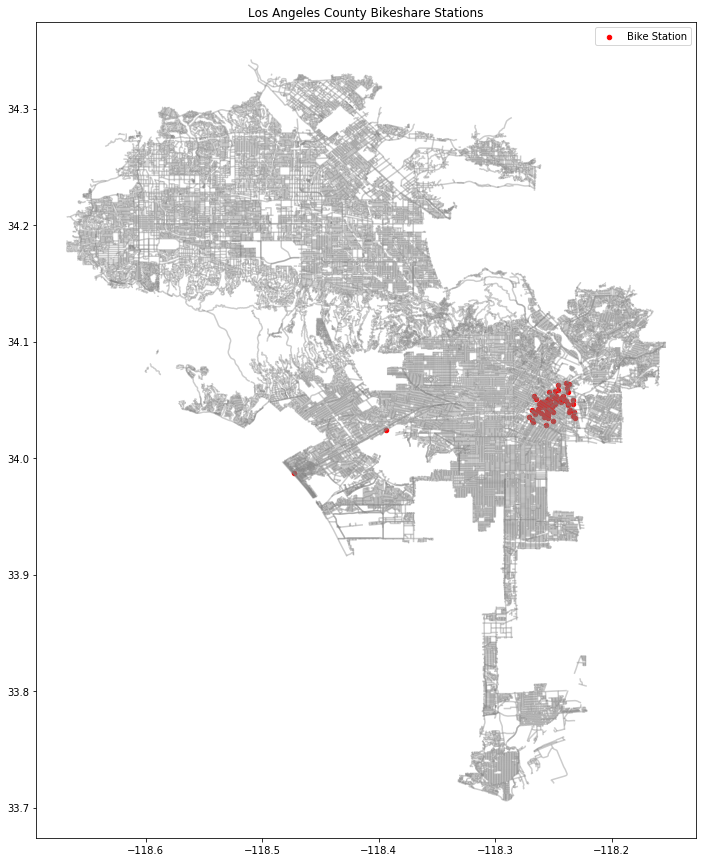

In [21]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax =ax, alpha = 0.4, color="grey")
geo_df.plot(ax=ax, markersize = 20, color = 'red', marker = 'o', label = 'Bike Station')
plt.legend(loc='upper right')
plt.title("Los Angeles County Bikeshare Stations")
plt.show()

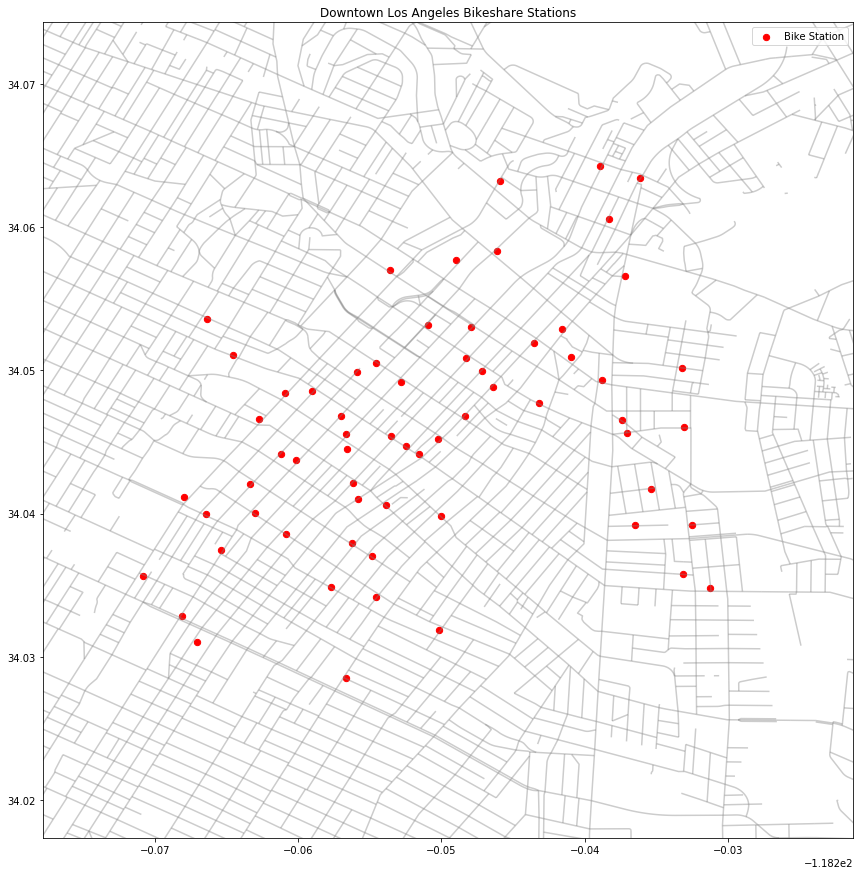

In [12]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax =ax, alpha = 0.4, color="grey")
geo_df.plot(ax=ax, markersize = 40, color = 'red', marker = 'o', label = 'Bike Station')
plt.legend(loc='upper right')
plt.title("Downtown Los Angeles Bikeshare Stations")

minx, miny, maxx, maxy = geo_df.total_bounds
ax.set_xlim(minx + 0.195, maxx + 0.01)
ax.set_ylim(miny + 0.03, maxy + 0.01)

plt.show()

In [22]:
#Most Used Stations
bikeshare.groupby('Starting Station ID').count().sort_values(by='Trip ID', ascending = False).iloc[:,0].head(5)

Starting Station ID
3069.0    5138
3030.0    5059
3005.0    4883
3064.0    4661
3031.0    4629
Name: Trip ID, dtype: int64

In [24]:
#Stations that most riders dock their bikes at
bikeshare.groupby('Ending Station ID').count().sort_values(by='Trip ID', ascending = False).iloc[:,0].head(5)

Ending Station ID
3005.0    6262
3031.0    5517
3014.0    5385
3042.0    5293
3069.0    5072
Name: Trip ID, dtype: int64

In [25]:
#Stations from which riders initiate the longest average ride duration
bikeshare.groupby('Starting Station ID').mean().sort_values(by='Duration', ascending = False)['Duration'].head(5)

Starting Station ID
3039.0    7590.782609
3000.0    5104.137931
3009.0    5014.285714
3011.0    2925.680191
3040.0    2815.366569
Name: Duration, dtype: float64

In [26]:
#Stations from which riders end the longer average ride duration
bikeshare.groupby('Ending Station ID').mean().sort_values(by='Duration', ascending = False)['Duration'].head(5)

Ending Station ID
3000.0    26754.471204
3039.0     7891.826087
3009.0     6027.352941
3040.0     3240.976934
3028.0     2746.986564
Name: Duration, dtype: float64

In [27]:
#What type of riders usually takes bikeshare rides in Downtown LA?
bikeshare.groupby('Passholder Type').count().sort_values(by="Trip ID", ascending = False).iloc[:,0]

Passholder Type
Monthly Pass    81304
Walk-up         41224
Flex Pass        9517
Staff Annual      382
Name: Trip ID, dtype: int64

In [28]:
#Number of unique bikes within the metro system (at least as many as are being used; this figure bikes that aren't dispatched from bike stations)
bikeshare['Bike ID'].nunique()

763

In [29]:
bikeshare['Starting Station ID'].nunique()

67

Annually committed ridership is concentrated among Monthly Pass holders. There are also many rides that are initiated by Walk-up riders.

Questions that arise from this visualization and analysis:
- Is there demand to supply bike station docks further outside the boundaries of Downtown LA?
- What routes are commonly taken by the passholders? How can we improve Dock Stations location or numbers to increase Annual and Monthly
- What incentives do Flex Pass holders have?
- Dockblocking and
- what is the average distance between stations?
- What is the average ride distance grouped by initiated stations?

Experimental Questions:
- Can the pricing structure of the passes be better optimized to increase total ridership and revenue?
- What are the next best areas to extend bike dock station availability?
- Will adding extra features such as higher beam lights increase?
- How about implementing a dockles option for bikes?

In [30]:
#LABikeshare = pd.read_csv('../__DATA__/metro-bike-share-trips-2018-q4.csv')
#LABikeshare.head()

In [31]:
bikeshare['Start Time'] = [d.replace('T',' ') for d in bikeshare['Start Time']]
bikeshare['Start Time'] = [pd.to_datetime(d) for d in bikeshare['Start Time']]
bikeshare['New Start Date'] = [d.date() for d in bikeshare['Start Time']]
bikeshare['New Start Time'] = [d.time() for d in bikeshare['Start Time']]

In [33]:
bikeshare.head()

,Trip ID,Duration,Start Time,End Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Bike ID,Plan Duration,Trip Route Category,Passholder Type,Starting Lat-Long,Ending Lat-Long,New Start Date,New Start Time
0,1912818,180,2016-07-07 04:17:00,2016-07-07T04:20:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05...",2016-07-07,04:17:00
1,1919661,1980,2016-07-07 06:00:00,2016-07-07T06:33:00,3014.0,34.056610,-118.23721,3014.0,34.056610,-118.23721,6281.0,30.0,Round Trip,Monthly Pass,"{'longitude': '-118.23721', 'latitude': '34.05...","{'longitude': '-118.23721', 'latitude': '34.05...",2016-07-07,06:00:00
2,1933383,300,2016-07-07 10:32:00,2016-07-07T10:37:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05...",2016-07-07,10:32:00
3,1944197,10860,2016-07-07 10:37:00,2016-07-07T13:38:00,3016.0,34.052898,-118.24156,3016.0,34.052898,-118.24156,5861.0,365.0,Round Trip,Flex Pass,"{'longitude': '-118.24156', 'latitude': '34.05...","{'longitude': '-118.24156', 'latitude': '34.05...",2016-07-07,10:37:00
4,1940317,420,2016-07-07 12:51:00,2016-07-07T12:58:00,3032.0,34.049889,-118.25588,3032.0,34.049889,-118.25588,6674.0,0.0,Round Trip,Walk-up,"{'longitude': '-118.25588', 'latitude': '34.04...","{'longitude': '-118.25588', 'latitude': '34.04...",2016-07-07,12:51:00


In [34]:
type(bikeshare['New Start Time'][0])

datetime.time

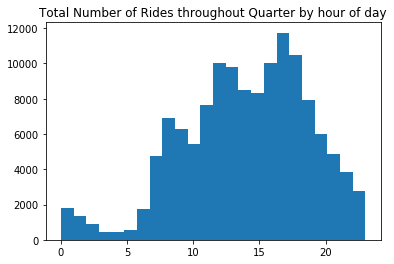

In [35]:
hours = []
for i in bikeshare['New Start Time']:
    hour = i.hour
    hours.append(hour)
plt.hist(hours, bins=24)
plt.title('Total Number of Rides throughout Quarter by hour of day')
plt.show()

There seem to be peaks at 8AM, 12PM, and 5PM in number of rides initiated. No anomolies, and ridership seems fairly normal throughout the day. 